# Russian qudits

<img src="https://rqc.ru/static/RQClogo_black_ru.png" alt="drawing" height="300">

## Annotation

The following notebook shows qudits, gates and channels for variational cirquits

Author: Artem Kuzmichev, Quantum Research Scientist, RQC

## qudit-vqc package


In [18]:
try:
    from qubit_variational_qc import *
    from qudit_depolarization_channels import *
    from qudit_gates import *
    from qudit_variational_qc import *

except ModuleNotFoundError:
    !git clone https://github.com/artem-phys/qudits-vqc.git --quiet
    !cd qudits-vqc
    !pip install -e qudits-vqc --quiet
    print('qudits-vqc succecefully installed. Run again')
    exit()

## imports and qudit configuration


We are going to study implementation of qudits for variational circuits. Since the real device we have in FIAN is two-qudit quantim computer with d=4 (ququarts), it appears reasonable to choose this specific value

In [19]:
import random
import sympy
import numpy as np

import cirq
from cirq.contrib.svg.svg import SVGCircuit

In [20]:
d = 4
n = 2

qudits = cirq.LineQid.range(n, dimension=d)
q0, q1 = qudits

print(qudits)

[cirq.LineQid(0, dimension=4), cirq.LineQid(1, dimension=4)]


##Ququart gates

In [21]:
simulator = cirq.Simulator()

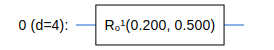

array([0.9950042 +0.j        , 0.04786269-0.08761206j,
       0.        +0.j        , 0.        +0.j        ], dtype=complex64)

In [22]:
circuit = cirq.Circuit(
    QuditRGate(0, 1, 0.2, 0.5).on(q0)
)

display(SVGCircuit(circuit))

result = simulator.simulate(circuit)
result.final_state_vector

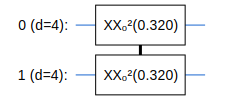

array([0.98722726+0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        -0.15931821j, 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ], dtype=complex64)

In [23]:
circuit = cirq.Circuit(
   QuditXXGate(0, 2, 0.32).on(q0, q1)
)
display(SVGCircuit(circuit))

result = simulator.simulate(circuit)
result.final_state_vector

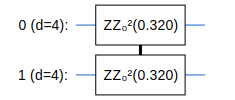

array([0.98722726-0.15931821j, 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ], dtype=complex64)

In [24]:
circuit = cirq.Circuit(
   QuditZZGate(0, 2, 0.32).on(q0, q1)
)

display(SVGCircuit(circuit))

result = simulator.simulate(circuit)
result.final_state_vector

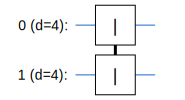

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
      dtype=complex64)

In [25]:
circuit = cirq.Circuit(
    QuditBarrier().on(q0, q1)
)

display(SVGCircuit(circuit))

result = simulator.simulate(circuit)
result.final_state_vector

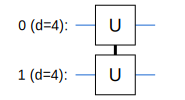

array([-0.00146792-0.05306542j,  0.25781298+0.21431023j,
        0.43515143+0.17179798j,  0.14822367+0.02491733j,
        0.22410254+0.01520582j,  0.00904502+0.02087253j,
        0.06385303-0.15151137j,  0.04530214+0.061984j  ,
        0.00763789+0.21629384j,  0.16536076-0.06338447j,
       -0.25882375-0.13416378j, -0.1925833 -0.31515113j,
       -0.137698  +0.2175723j ,  0.13675192+0.06816558j,
        0.02121171+0.00114959j, -0.36803666+0.18513663j], dtype=complex64)

In [26]:
circuit = cirq.Circuit(
    QuditArbitraryUnitary().on(q0, q1)
)

display(SVGCircuit(circuit))

result = simulator.simulate(circuit)
result.final_state_vector

##Depolarizing channels


Parameter p of the depolarizing channel can be restored from experimentally mesured fidelities of single-qudit and two-qudit operations. From
\begin{equation}
    f = 1 - p +  \frac{p}{d^2}
\end{equation}
we obtain:
\begin{equation}
    p = \left(1 -  \frac{1}{d^2}\right)^{-1} \cdot \left(1 - f \right)
\end{equation}

For single-qudit operations

In [27]:
f1 = 0.99
p1 = (1 - f1) / (1 - 1 / d ** 2)
p1

0.010666666666666677

For two-qudit operations

In [28]:
f2 = 0.96
p2 = (1 - f2) / (1 - 1 / (d ** 2) ** 2)
p2

0.040156862745098075

In [29]:
dmsimulator = cirq.DensityMatrixSimulator()

Single-qudit channel

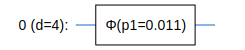

array([[0.99200004+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.00266667+0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.00266667+0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.00266667+0.j]],
      dtype=complex64)

In [30]:
circuit = cirq.Circuit(
    QuquartDepolarizingChannel().on(q0)
)

display(SVGCircuit(circuit))

result = dmsimulator.simulate(circuit)
result.final_density_matrix

Two-qudit channel

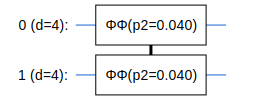

array([[0.96235317+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.0025098 +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.0025098 +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.0025098 +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.   

In [31]:
circuit = cirq.Circuit(
    DoubleQuquartDepolarizingChannel().on(q0, q1)
)

display(SVGCircuit(circuit))

result = dmsimulator.simulate(circuit)
result.final_density_matrix